In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

In [15]:
# Define a function to place an arrow on a plot
def add_arrow(line, position=None, direction='right', size=15, color='k'):
    """
    Add an arrow to a line.

    line:       Line2D object
    position:   x-position of the arrow on the line (None means middle)
    direction:  'left' or 'right' indicating the arrow direction
    size:       size of the arrow
    color:      color of the arrow
    """
    if position is None:
        position = line.get_xdata().mean()
    # Find the closest index to the specified position
    start_ind = np.argmin(np.absolute(line.get_xdata() - position))
    if direction == 'right':
        end_ind = start_ind + 1
    else:
        end_ind = start_ind - 1

    line.axes.annotate('', # What i want to display
                       xytext=(line.get_xdata()[start_ind], line.get_ydata()[start_ind]), # Where i want to display it
                       xy=(line.get_xdata()[end_ind], line.get_ydata()[end_ind]), # Where i want to point
                       arrowprops=dict(arrowstyle="-|>", color=color), # How i want the arrow to look
                       size=size) # Size of the arrow

C:\Users\rannu\AppData\Local\Temp\ipykernel_21216\4122639161.py:32: RuntimeWarning: invalid value encountered in sqrt
  y_values = np.sqrt(2 * (E + np.cos(x_values)))
C:\Users\rannu\AppData\Local\Temp\ipykernel_21216\4122639161.py:54: RuntimeWarning: invalid value encountered in sqrt
  y_values = np.sqrt(2 * (E + np.cos(x_values)))


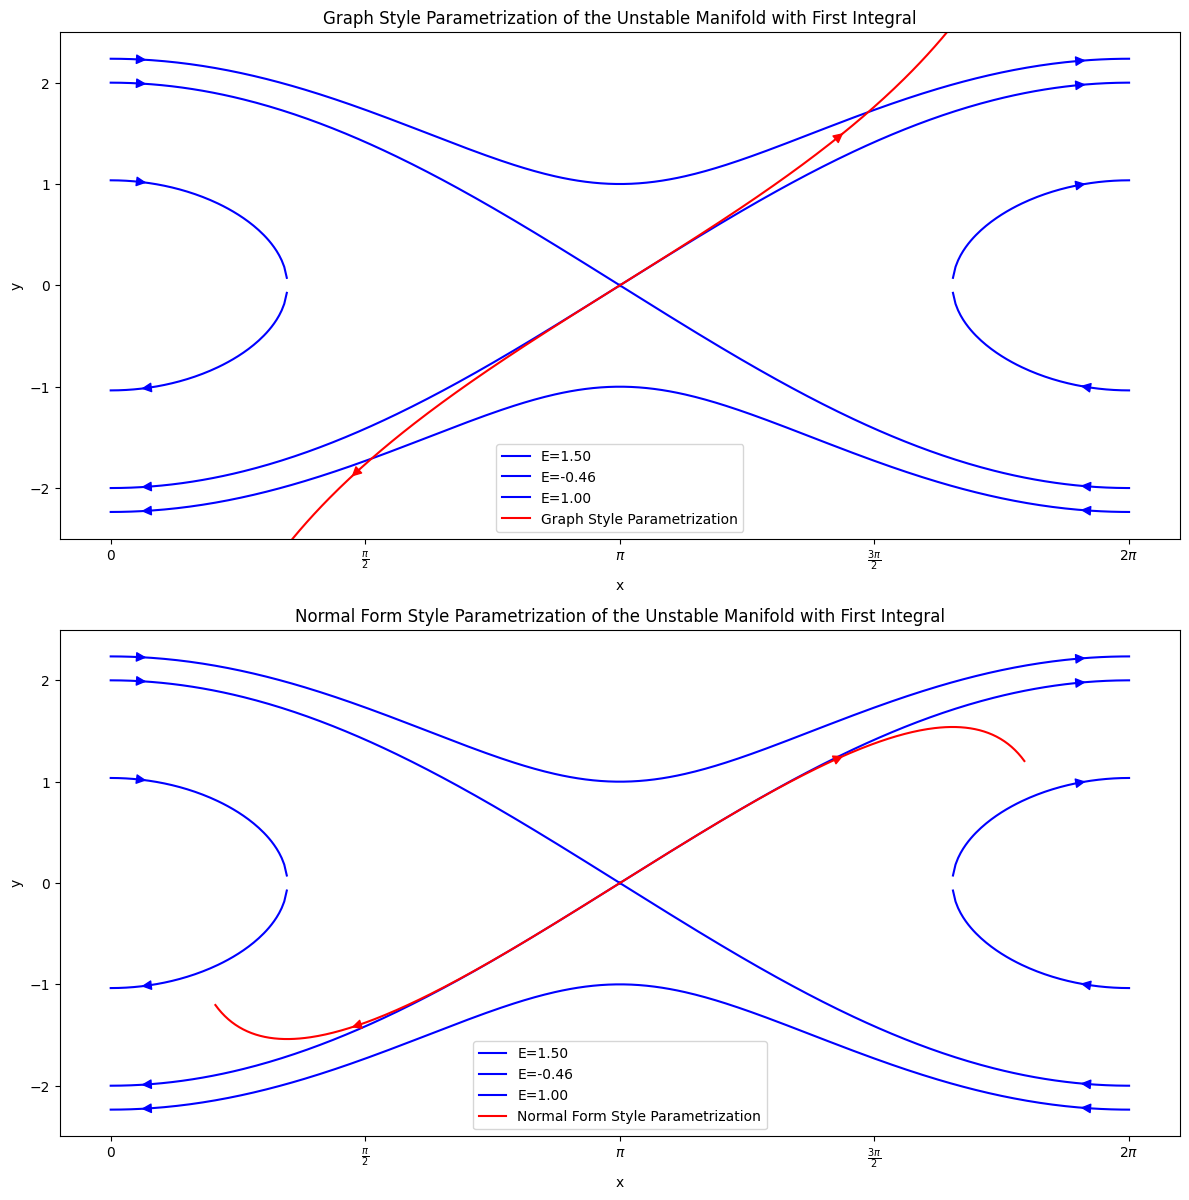

In [16]:
# Defining the parametrization functions for both styles
def graph_style_param(s):
    return np.array([np.pi, 0]) + np.array([1, 1]) * s - (1/48) * np.array([1, -1]) * s**3

def normal_form_param(s):
    return np.array([np.pi, 0]) + np.array([1, 1]) * s - (1/48) * np.array([1, 3]) * s**3
    return np.array([np.pi, 0]) + np.array([1, 1]) * s - np.array([1/48, 1/16]) * s**3

# Define the first integral function for the pendulum
def first_integral_energy(x, y):
    return (y**2) / 2 - np.cos(x)

# Define the range of s for plotting
plot_range = [-np.pi, np.pi]
s_values = np.linspace(plot_range[0],plot_range[1], 400)
x_values = np.linspace(plot_range[0]+np.pi,plot_range[1]+np.pi, 400)

# Calculate the corresponding y values for a given energy level
# We will select a few energy levels that are likely to intersect with the manifold parametrization
energy_levels = [first_integral_energy(np.pi, 1), first_integral_energy(2.3*np.pi, 0.5), first_integral_energy(np.pi, 0)]

# Compute the parametrization for both styles
graph_style_points = np.array([graph_style_param(s) for s in s_values])
normal_form_points = np.array([normal_form_param(s) for s in s_values])

plt.figure(figsize=(12,12))

# Graph Style Parametrization and First Integral Level Curves
plt.subplot(2, 1, 1)
for E in energy_levels:
    # Solve for y given E and x: E = (y^2)/2 - cos(x)
    y_values = np.sqrt(2 * (E + np.cos(x_values)))
    line_integral_up, = plt.plot(x_values, y_values, 'b', label=f'E={E:.2f}')
    add_arrow(line_integral_up, position=0.2, direction='right', color='b')
    add_arrow(line_integral_up, position=6, direction='right', color='b')
    line_integral_down, = plt.plot(x_values, -y_values, 'b')  # Negative solution
    add_arrow(line_integral_down, position=0.2, direction='left', color='b')
    add_arrow(line_integral_down, position=6, direction='left', color='b')
line_graph_style, = plt.plot(graph_style_points[:, 0], graph_style_points[:, 1], 'red', label='Graph Style Parametrization')
add_arrow(line_graph_style, position=1.5, direction='left', color='red')
add_arrow(line_graph_style, position=4.5, direction='right', color='red')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Graph Style Parametrization of the Unstable Manifold with First Integral')
x_ticks = np.linspace(0, 2*np.pi, 5)  # 5 points including 0 and 2*pi
x_labels = ['0', r'$\frac{\pi}{2}$', r'$\pi$', r'$\frac{3\pi}{2}$', r'$2\pi$']
plt.xticks(x_ticks, x_labels)
plt.ylim(-2.5, 2.5)
plt.legend()

# Normal Form Style Parametrization and First Integral Level Curves
plt.subplot(2, 1, 2)
for E in energy_levels:
    y_values = np.sqrt(2 * (E + np.cos(x_values)))
    line_integral_up, = plt.plot(x_values, y_values, 'b', label=f'E={E:.2f}')
    add_arrow(line_integral_up, position=0.2, direction='right', color='b')
    add_arrow(line_integral_up, position=6, direction='right', color='b')
    line_integral_down, = plt.plot(x_values, -y_values, 'b')  # Negative solution
    add_arrow(line_integral_down, position=0.2, direction='left', color='b')
    add_arrow(line_integral_down, position=6, direction='left', color='b')
line_graph_style, = plt.plot(normal_form_points[:, 0], normal_form_points[:, 1], 'red', label='Normal Form Style Parametrization')
add_arrow(line_graph_style, position=1.5, direction='left', color='red')
add_arrow(line_graph_style, position=4.5, direction='right', color='red')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Normal Form Style Parametrization of the Unstable Manifold with First Integral')
plt.legend()
plt.tight_layout()
x_ticks = np.linspace(0, 2*np.pi, 5)  # 5 points including 0 and 2*pi
x_labels = ['0', r'$\frac{\pi}{2}$', r'$\pi$', r'$\frac{3\pi}{2}$', r'$2\pi$']
plt.xticks(x_ticks, x_labels)
plt.ylim(-2.5, 2.5)
plt.show()